In [ ]:
"""
Purpose : To replicate OLS statsmodel from scratch
Value   : Understand the bottom-line implementation details
          Reference to re-fresh concepts as required           
Data    : get the dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Disclaimer : Kudos to all open source concepts, details and even code inspirations
"""

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

In [2]:
dataset = pd.read_csv('train.csv')
print(dataset.shape)
dataset.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# initializing our inputs and outputs
X = dataset['GrLivArea'].values
Y = dataset['SalePrice'].values

In [4]:
"""
OLS model from statsmodel
"""

In [5]:
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          4.52e-223
Time:                        09:30:20   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [6]:
ypred = results.predict(sm.add_constant(X))

In [7]:
sqrt(mean_squared_error(Y, ypred))

56034.303865279944

In [ ]:
"""
OLS Model from statsmodel - metrics
R-squared = 0.502
RMSE      = 56034.30
"""

In [ ]:
"""
OLS model from scratch
    Implemented only R-square and RMSE metrics
    TODO : F test, AIC metrics as time permits
"""

In [13]:
def OLS_from_scratch(Y,X):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    n = len(X)
    numerator = 0
    denominator = 0
    for i in range(n):
        numerator += (X[i] - x_mean) * (Y[i] - y_mean)
        denominator += (X[i] - x_mean) ** 2
    x1_coef = numerator / denominator
    const = y_mean - (x1_coef * x_mean)
    
    sumofsquares = 0
    sumofresiduals = 0
    for i in range(n) :
        y_pred = const + x1_coef * X[i]
        sumofsquares += (Y[i] - y_mean) ** 2
        sumofresiduals += (Y[i] - y_pred) **2
    
    rsquare  = 1 - (sumofresiduals/sumofsquares)
    rmse = np.sqrt(sumofresiduals/n)
    
    return const, x1_coef, rsquare, rmse
        

In [14]:
const, x1_coef,rsquare, rmse = OLS_from_scratch(Y,X)

In [16]:
print("Equvation: Y = {} + {} * X and R-square = {} , RMSE = {} ".format(const,x1_coef,rsquare, rmse))

Equvation: Y = 18569.025856487482 + 107.13035896582502 * X and R-square = 0.5021486502718047 , RMSE = 56034.30386527994 


In [ ]:
"""
OLS Model from scratch - metrics
R-squared = 0.502
RMSE      = 56034.30
"""

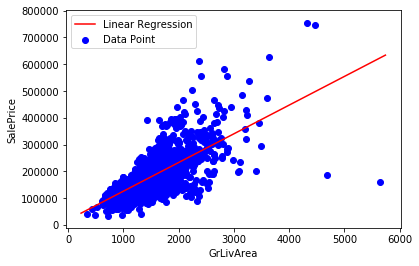

In [18]:

x_max = np.max(X) + 100
x_min = np.min(X) - 100

x = np.linspace(x_min, x_max, 1000)
y = const + x1_coef * x

plt.plot(x, y, color='#ff0000', label='Linear Regression')
plt.scatter(X, Y, color='#0000FF', label='Data Point')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.legend()
plt.show()